In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from matplotlib import pylab
from scipy import stats

In [83]:
songs = pd.read_csv("songsWithPopularity.csv",sep=",")
songs = songs[songs["Spotify_Popularity"] > 0]

# Rank 1 Songs Analysis

In [84]:
rank1Songs = songs[songs["Rank"] == 1]
rank1Songs.head(10)

,year,Rank,Artist,Title,Spotify_Popularity
0,1960,1,Percy Faith,Theme From “A Summer Place”,52
600,1966,1,Sgt. Barry Sadler,The Ballad Of The Green Berets,41
700,1967,1,Lulu,To Sir With Love,44
900,1969,1,Archies,"Sugar, Sugar",56
1000,1970,1,Simon and Garfunkel,Bridge Over Troubled Water,68
1100,1971,1,Three Dog Night,Joy To The World,61
1200,1972,1,Roberta Flack,The First Time Ever I Saw Your Face,62
1400,1974,1,Barbra Streisand,The Way We Were,51
1500,1975,1,Captain and Tennille,Love Will Keep Us Together,56
1600,1976,1,Wings,Silly Love Songs,56


# Curve Fitting

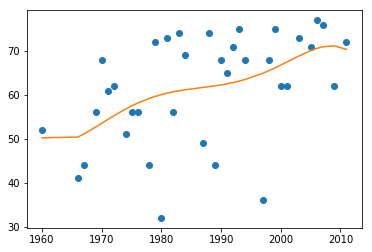

In [85]:


trainX = rank1Songs["year"]
trainY = rank1Songs["Spotify_Popularity"]
polynomialDegree = 5
z = np.polyfit(trainX,trainY,polynomialDegree)
f = np.poly1d(z)
y_new = f(trainX)
plt.plot(trainX, trainY,'o', trainX, y_new)

# Outlier Detection - Rank 1 Songs - Z Score Method

In [86]:
from scipy import stats
z = np.abs(stats.zscore(rank1Songs["Spotify_Popularity"]))
rank1Songs["Z_Score"] = z
rank1Songs.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,year,Rank,Artist,Title,Spotify_Popularity,Z_Score
0,1960,1,Percy Faith,Theme From “A Summer Place”,52,0.780184
600,1966,1,Sgt. Barry Sadler,The Ballad Of The Green Berets,41,1.680922
700,1967,1,Lulu,To Sir With Love,44,1.435266
900,1969,1,Archies,"Sugar, Sugar",56,0.452643
1000,1970,1,Simon and Garfunkel,Bridge Over Troubled Water,68,0.529980


In [87]:
threshold = 2
updatedRank1Songs = rank1Songs[rank1Songs["Z_Score"] > threshold]
updatedRank1Songs.head()

,year,Rank,Artist,Title,Spotify_Popularity,Z_Score
2000,1980,1,Blondie,Call Me,32,2.417889
3700,1997,1,Elton John,Candle In The Wind 1997,36,2.090348


# Outlier Detection - All Songs - IQR Method

In [89]:
threshold = 2
appended_data = []
for i in range(1, 100):
    rankISongs = songs[songs["Rank"] == i]
    
    trainX = rankISongs["year"]
    trainY = rankISongs["Spotify_Popularity"]
    
    quartile_1, quartile_3 = np.percentile(rankISongs["Spotify_Popularity"], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    
    outliers = rankISongs[(rankISongs["Spotify_Popularity"] > upper_bound) | (rankISongs["Spotify_Popularity"] < lower_bound)]
    appended_data.append(outliers)
    
    '''
    polynomialDegree = 5
    z = np.polyfit(trainX, trainY, polynomialDegree)
    f = np.poly1d(z)
    y_new = f(trainX)
    plt.figure()
    plt.plot(trainX, trainY,'o', trainX, y_new)
    plt.show()
    '''

df = pd.concat(appended_data)
df = df[df['year'] <= 1980]
df.head(10)
#df.sort_values(by=['Spotify_Popularity'], ascending = False).head(2)

,year,Rank,Artist,Title,Spotify_Popularity
601,1966,2,Association,Cherish,36
102,1961,3,Highwaymen,Michael,5
1905,1979,6,Gloria Gaynor,I Will Survive,15
106,1961,7,Chubby Checker,Pony Time,23
1106,1971,7,Donny Osmond,Go Away Little Girl,28
1406,1974,7,MFSB,TSOP,32
1407,1974,8,Ray Stevens,The Streak,31
1807,1978,8,Andy Gibb,(Love Is) Thicker Than Water,36
108,1961,9,Dee Clark,Raindrops,8
909,1969,10,Tommy James and The Shondells,Crimson And Clover,39
